# Question(5)

4422102/4422102 [==============================] - 0s 0us/step


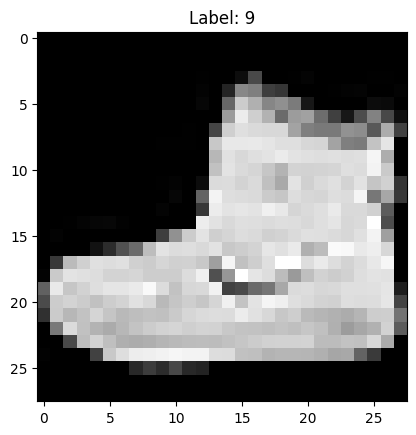

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

Shape of Covariance Matrix: (784, 784)


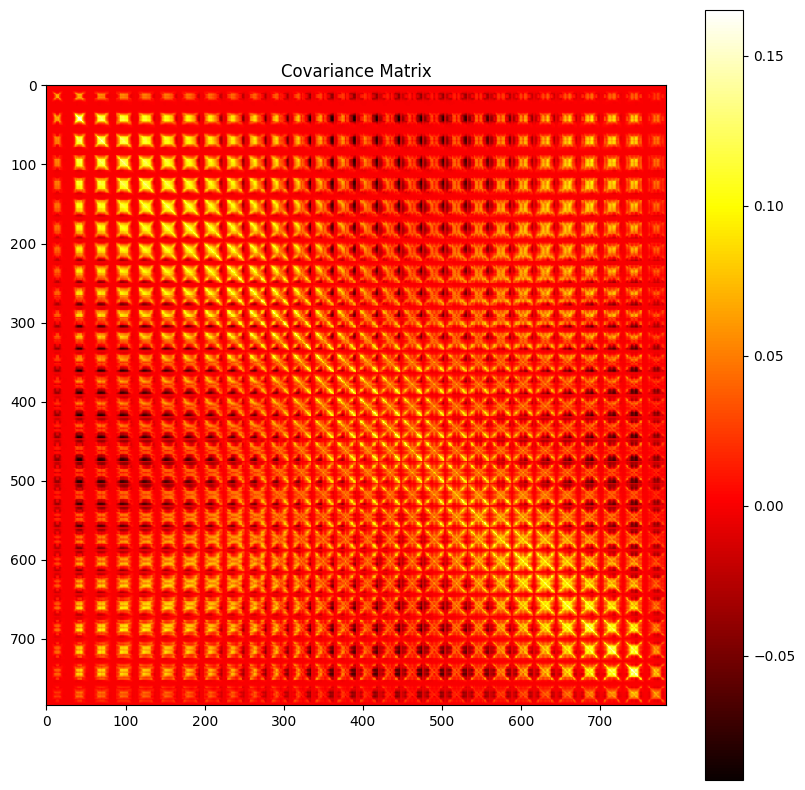

In [ ]:
covariance_matrix = np.cov(x_train_flatten, rowvar=False)

print("Shape of Covariance Matrix:", covariance_matrix.shape)

plt.figure(figsize=(10, 10))
plt.imshow(covariance_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Covariance Matrix')
plt.show()

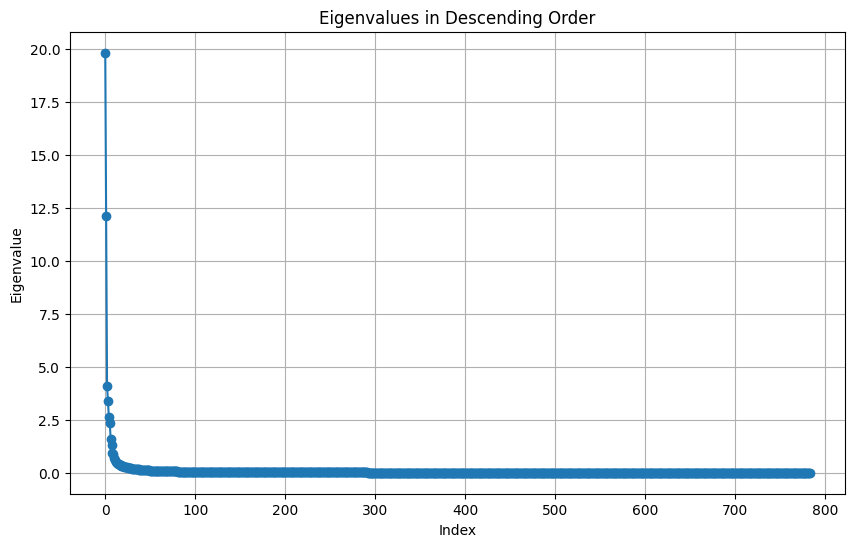

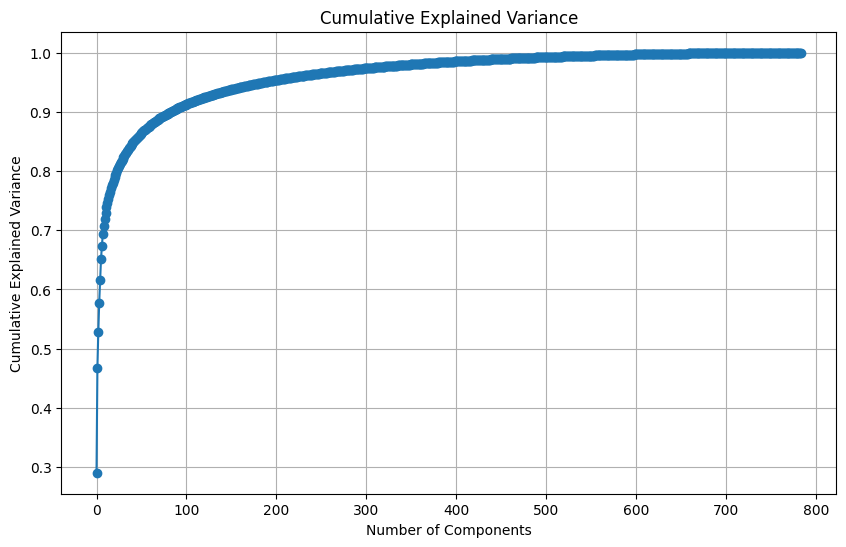

Number of components explaining at least 95.0% of the variance: 187


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, marker='o')
plt.title('Eigenvalues in Descending Order')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f'Number of components explaining at least {threshold*100}% of the variance: {num_components}')

In [ ]:
from sklearn.decomposition import PCA

n_components = 187
pca = PCA(n_components=n_components)

pca.fit(x_train_flatten)

x_train_pca = pca.transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)

explained_variance = np.sum(pca.explained_variance_ratio_)
print(f'Explained variance by {n_components} components: {explained_variance:.2f}')

Explained variance by 187 components: 0.95


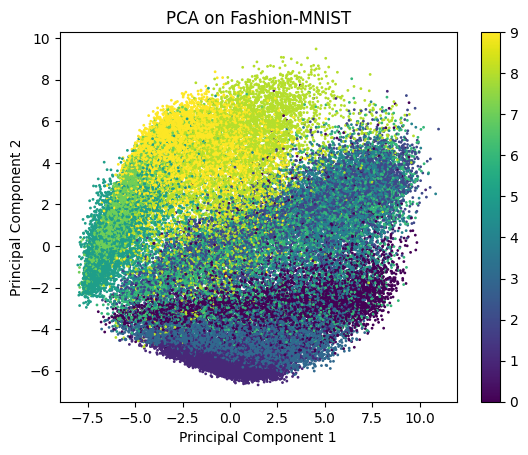

In [ ]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', s=1)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Fashion-MNIST')
plt.show()

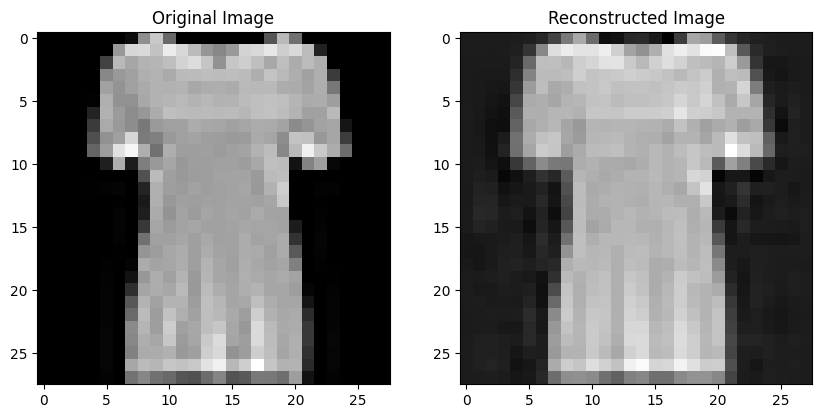

In [ ]:
x_train_reconstructed = pca.inverse_transform(x_train_pca)

x_train_reconstructed = x_train_reconstructed.reshape(x_train.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(x_train[10], cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(x_train_reconstructed[10], cmap='gray')
axes[1].set_title('Reconstructed Image')
plt.show()

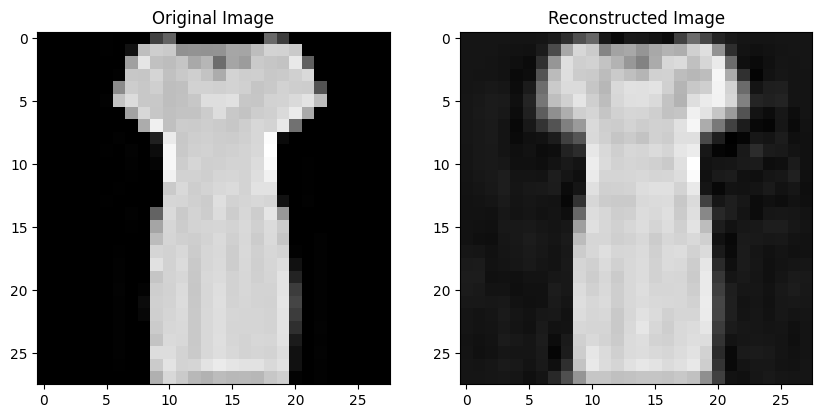

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(x_train[20], cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(x_train_reconstructed[20], cmap='gray')
axes[1].set_title('Reconstructed Image')
plt.show()

# Question(6)

4422102/4422102 [==============================] - 0s 0us/step


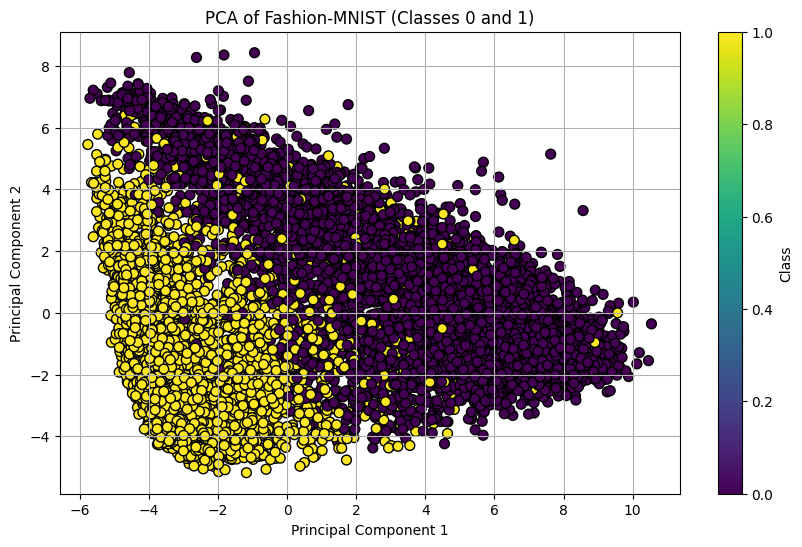

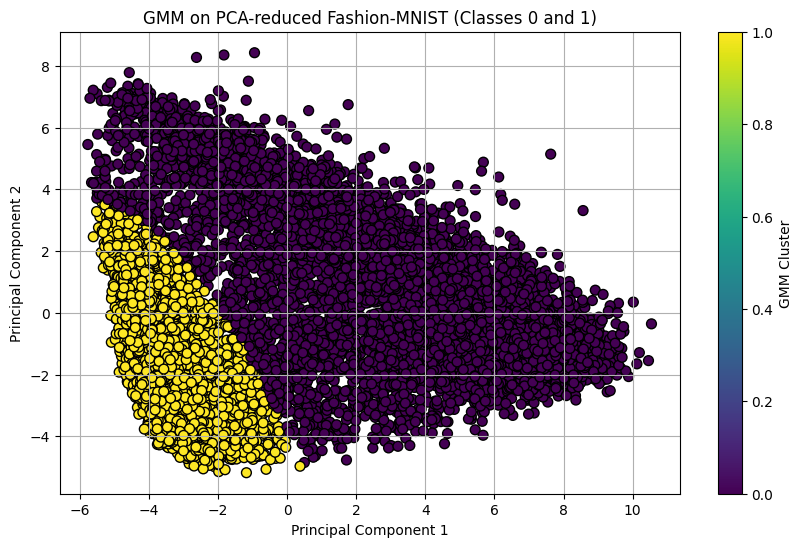

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


filter_classes = [0, 1]
train_filter = np.isin(y_train, filter_classes)
test_filter = np.isin(y_test, filter_classes)

x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

x_train_filtered = x_train_filtered / 255.0
x_test_filtered = x_test_filtered / 255.0

x_train_flatten = x_train_filtered.reshape(x_train_filtered.shape[0], -1)
x_test_flatten = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)

plt.figure(figsize=(10, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_filtered, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Fashion-MNIST (Classes 0 and 1)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(x_train_pca)

labels = gmm.predict(x_train_pca)

plt.figure(figsize=(10, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('GMM on PCA-reduced Fashion-MNIST (Classes 0 and 1)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='GMM Cluster')
plt.grid(True)
plt.show()

Euclidean distance between the means of the two GMM components: 6.5491012156196255


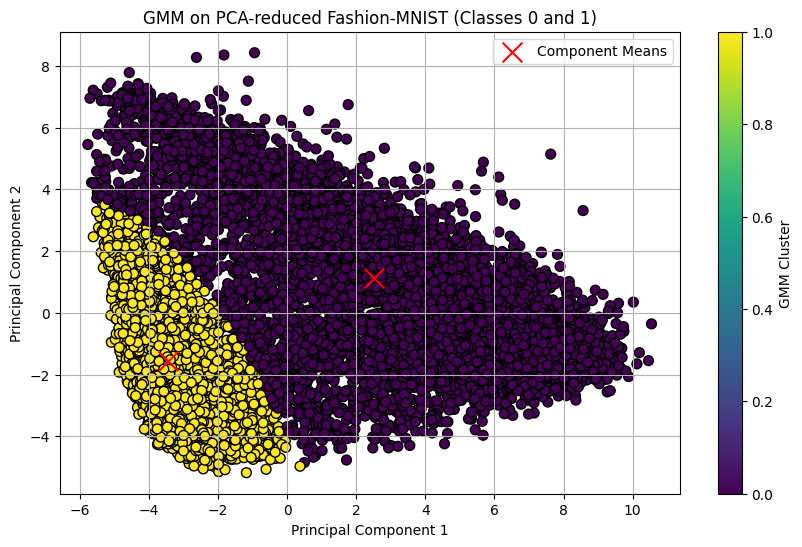

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import euclidean

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

filter_classes = [0, 1]
train_filter = np.isin(y_train, filter_classes)
test_filter = np.isin(y_test, filter_classes)

x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

x_train_filtered = x_train_filtered / 255.0
x_test_filtered = x_test_filtered / 255.0

x_train_flatten = x_train_filtered.reshape(x_train_filtered.shape[0], -1)
x_test_flatten = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(x_train_pca)

means = gmm.means_

distance = euclidean(means[0], means[1])
print(f'Euclidean distance between the means of the two GMM components: {distance}')

labels = gmm.predict(x_train_pca)
plt.figure(figsize=(10, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=200, label='Component Means')
plt.title('GMM on PCA-reduced Fashion-MNIST (Classes 0 and 1)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='GMM Cluster')
plt.legend()
plt.grid(True)
plt.show()

Euclidean distance between the means of the two GMM components: 6.5491012156196255


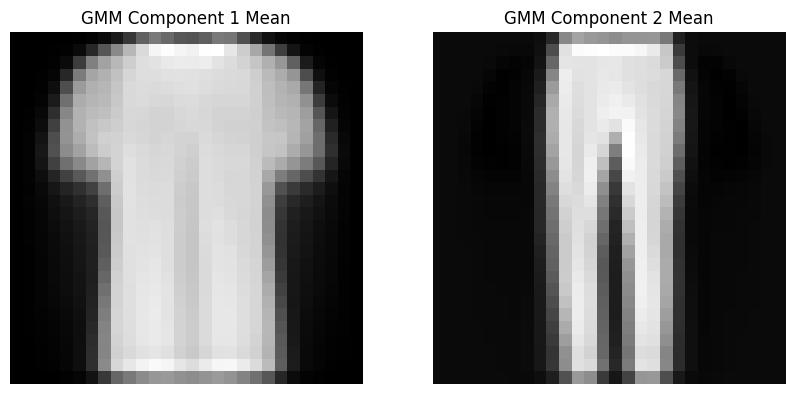

In [ ]:
means_2d = gmm.means_

distance = euclidean(means_2d[0], means_2d[1])
print(f'Euclidean distance between the means of the two GMM components: {distance}')

means_784d = pca.inverse_transform(means_2d)

plt.figure(figsize=(10, 5))

for i, mean in enumerate(means_784d):
    plt.subplot(1, 2, i + 1)
    plt.imshow(mean.reshape(28, 28), cmap='gray')
    plt.title(f'GMM Component {i+1} Mean')
    plt.axis('off')

plt.show()

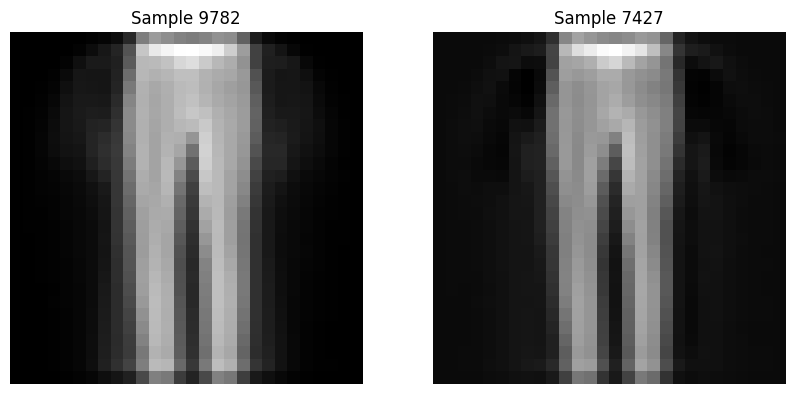

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import euclidean

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

filter_classes = [0, 1]
train_filter = np.isin(y_train, filter_classes)
test_filter = np.isin(y_test, filter_classes)

x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

x_train_filtered = x_train_filtered / 255.0
x_test_filtered = x_test_filtered / 255.0

x_train_flatten = x_train_filtered.reshape(x_train_filtered.shape[0], -1)
x_test_flatten = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(x_train_pca)

probs = gmm.predict_proba(x_train_pca)

prob_diff = np.abs(probs[:, 0] - probs[:, 1])

min_diff_indices = np.argsort(prob_diff)[:2]

min_diff_samples_2d = x_train_pca[min_diff_indices]
min_diff_samples_784d = pca.inverse_transform(min_diff_samples_2d)

plt.figure(figsize=(10, 5))

for i, sample in enumerate(min_diff_samples_784d):
    plt.subplot(1, 2, i + 1)
    plt.imshow(sample.reshape(28, 28), cmap='gray')
    plt.title(f'Sample {min_diff_indices[i]}')
    plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import euclidean
from itertools import combinations

(x_train, y_train), _ = fashion_mnist.load_data()

filter_classes = [0, 1]
train_filter = np.isin(y_train, filter_classes)
test_filter = np.isin(y_test, filter_classes)

x_train = x_train / 255.0

x_train_flatten = x_train.reshape(x_train.shape[0], -1)

def process_class_pair(class1, class2):
    filter_classes = [class1, class2]
    class_filter = np.isin(y_train, filter_classes)

    x_filtered = x_train[class_filter]
    y_filtered = y_train[class_filter]

    x_flatten_filtered = x_filtered.reshape(x_filtered.shape[0], -1)

    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_flatten_filtered)

    gmm = GaussianMixture(n_components=2, random_state=0)
    gmm.fit(x_pca)


    means = gmm.means_

    distance = euclidean(means[0], means[1])

    return distance, (class1, class2)


class_pairs = list(combinations(range(10), 2))


distances = []
for class1, class2 in class_pairs:
    distance, pair = process_class_pair(class1, class2)
    distances.append((distance, pair))

max_distance, max_pair = max(distances, key=lambda x: x[0])
min_distance, min_pair = min(distances, key=lambda x: x[0])

print(f'Largest distance: {max_distance} between classes {max_pair}')
print(f'Smallest distance: {min_distance} between classes {min_pair}')

Largest distance: 10.70480391166218 between classes (1, 9)
Smallest distance: 4.313038351319221 between classes (5, 7)


# Question(7)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data_path = "/content/drive/MyDrive/ML_HW5/customers_dataset.csv"

df = pd.read_csv(data_path)

gender_map = {"Male": 0, "Female": 1}

df["Gender"] = df["Gender"].map(gender_map)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Gender,Age,Income,Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [7]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [8]:
!pip install pyclustertend
# !pip install pyclustertend==1.7.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

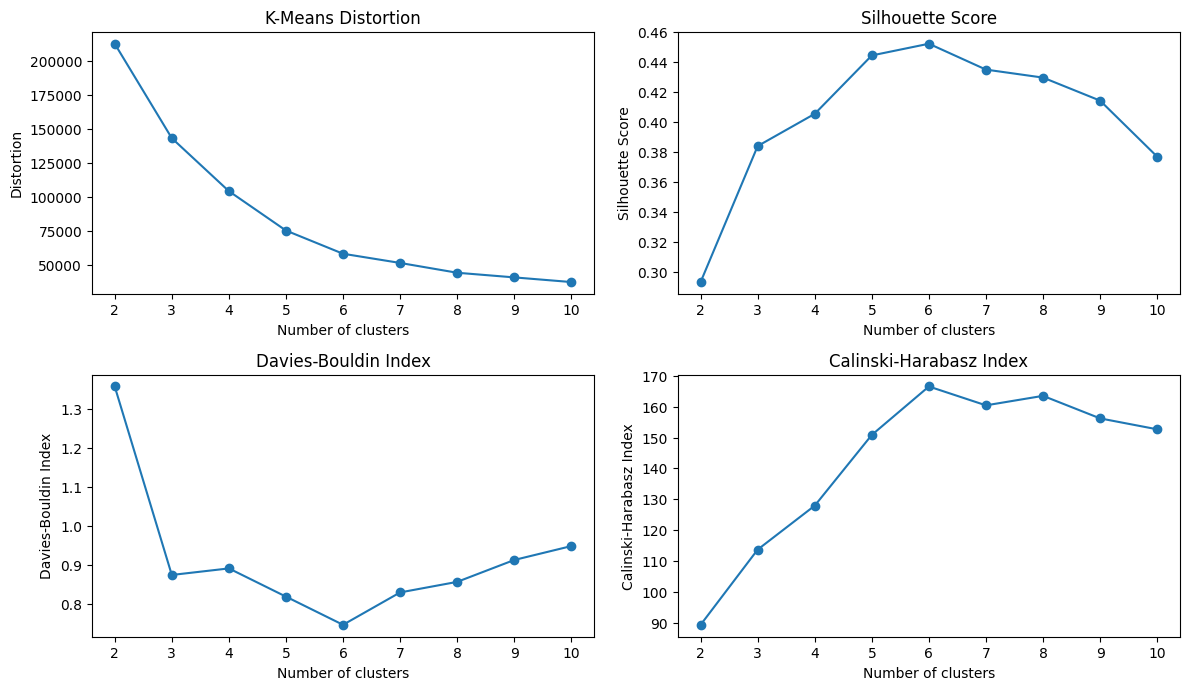

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# from pyclustertend import hopkins, dunn


X = df[['Gender', 'Age', 'Income', 'Score']]

distortions = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
# dunn_indexes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, kmeans.labels_))

plt.figure(figsize=(12, 10))

# K-Means Distortion
plt.subplot(3, 2, 1)
plt.plot(range(2, 11), distortions, marker='o')
plt.title('K-Means Distortion')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# Silhouette Score
plt.subplot(3, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

# Davies-Bouldin Index
plt.subplot(3, 2, 3)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')

# Calinski-Harabasz Index
plt.subplot(3, 2, 4)
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')

# Dunn Index
# plt.subplot(3, 2, 5)
# plt.plot(range(2, 11), dunn_indexes, marker='o')
# plt.title('Dunn Index')
# plt.xlabel('Number of clusters')
# plt.ylabel('Dunn Index')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


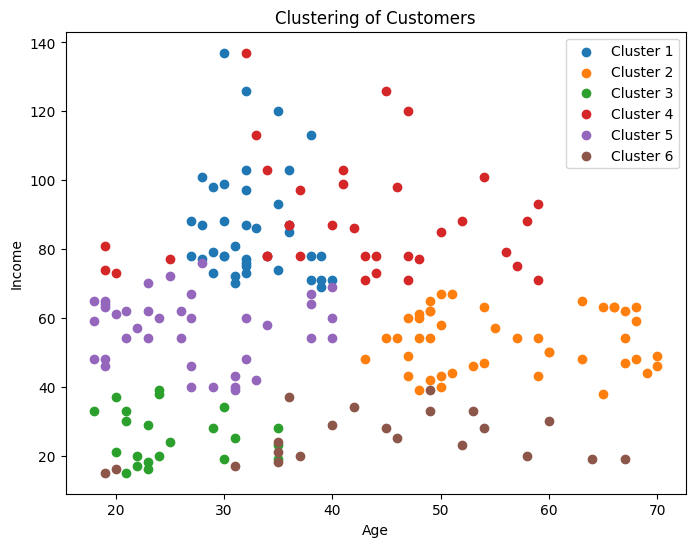

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[['Gender', 'Age', 'Income', 'Score']]

kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster_label'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))

for cluster in range(6):
    cluster_data = df[df['cluster_label'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Income'], label=f'Cluster {cluster+1}')

plt.title('Clustering of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


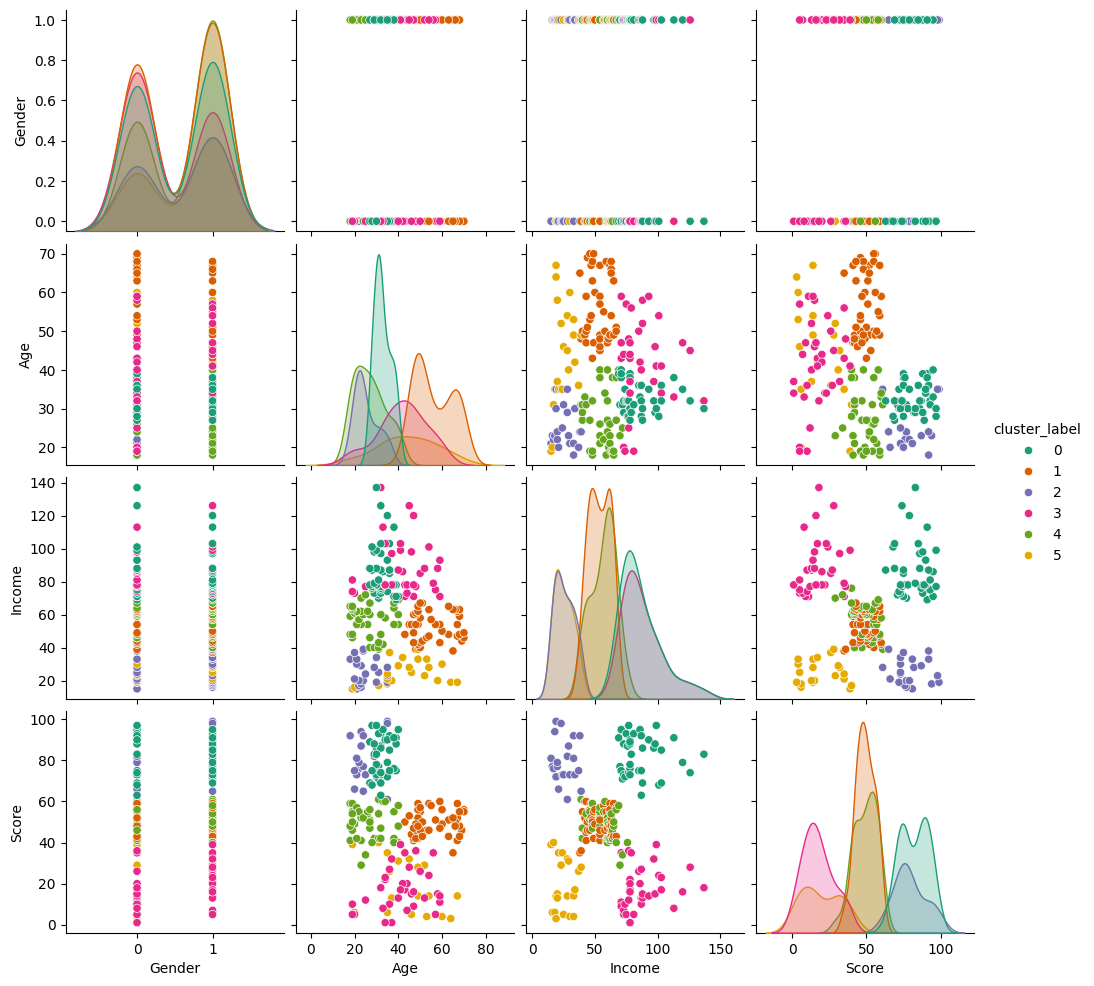

NameError: name 'pairplot' is not defined

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[['Gender', 'Age', 'Income', 'Score']]

kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster_label'] = kmeans.fit_predict(X)

sns.pairplot(df, hue='cluster_label', palette='Dark2', diag_kind='kde')
plt.show()